In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [20]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [21]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [22]:
df.shape

(5000, 7)

In [39]:
df.tail(15)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4985,75117.042949,6.036275,6.538111,2.22,43976.031060,1.378938e+06
4986,71060.406015,5.718839,7.222730,4.34,34814.585591,1.260241e+06
4987,65729.222330,6.237787,6.860475,3.12,25573.854289,1.197073e+06
4988,67637.840665,7.056673,5.774409,3.05,43846.531340,1.275143e+06
4989,47965.406896,5.694638,7.363327,5.40,46071.947337,8.852050e+05
4990,52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06
4994,73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05


In [23]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


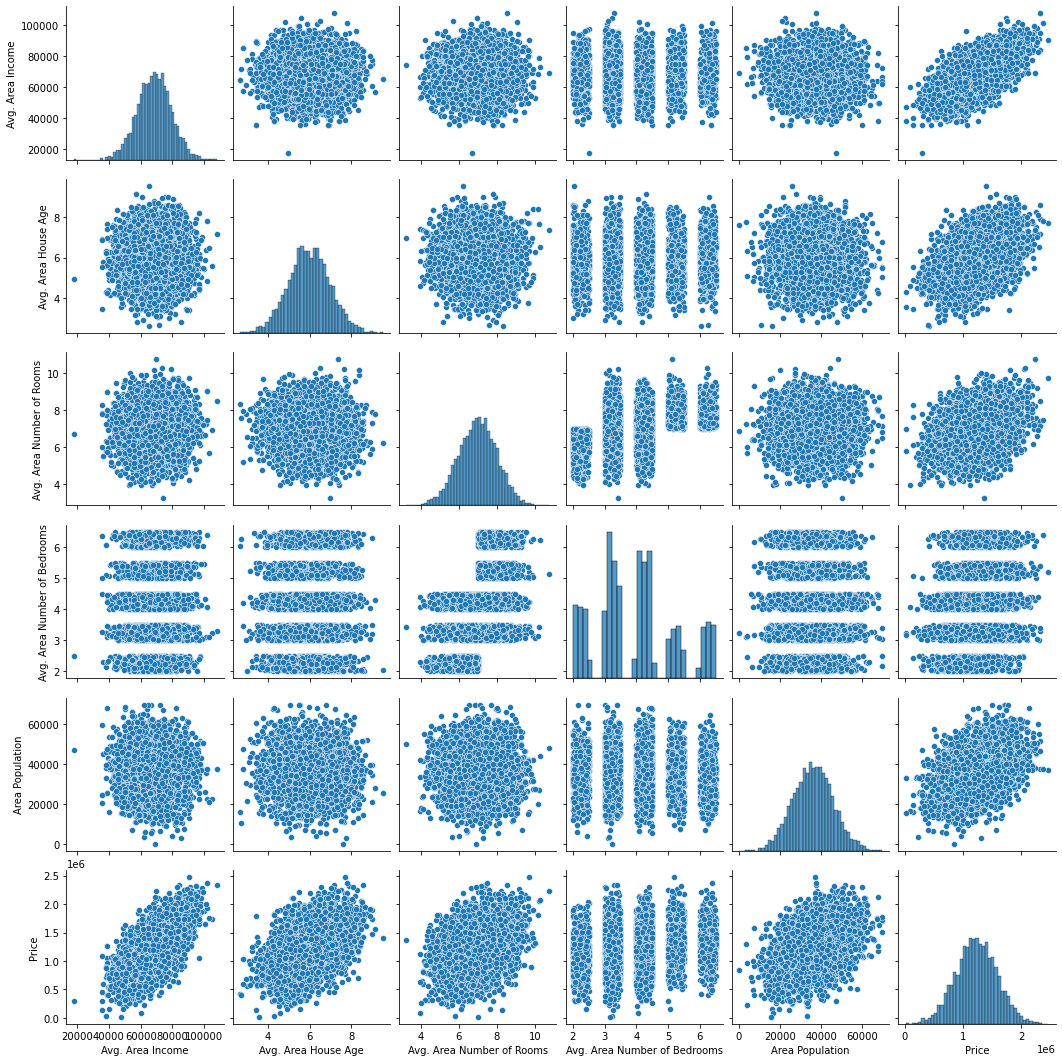

In [24]:
sns.pairplot(df[:-1])

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Avg. Area Number of Rooms'>

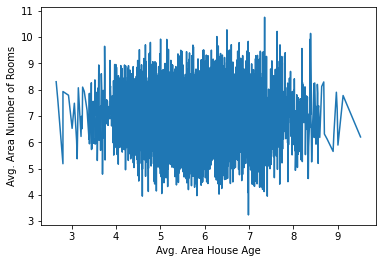

In [25]:
sns.lineplot(data=df, x='Avg. Area House Age', y='Avg. Area Number of Rooms')

In [26]:
df.drop('Address', inplace=True, axis=1)

In [27]:
"""from sklearn import preprocessing
x = df.iloc[:,:-1]
normalize = preprocessing.MinMaxScaler()
df_scaled = normalize.fit_transform(x)
new_df = pd.DataFrame(df_scaled)
new_df.head()"""

'from sklearn import preprocessing\nx = df.iloc[:,:-1]\nnormalize = preprocessing.MinMaxScaler()\ndf_scaled = normalize.fit_transform(x)\nnew_df = pd.DataFrame(df_scaled)\nnew_df.head()'

In [28]:
X = df.iloc[:,:-1]
y = df['Price']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
y_pred

array([1308536.13592605, 1237122.72746462, 1243835.62817079, ...,
       1457119.79297226, 1483428.95309313, 1047510.59737201])

In [77]:
#hyper parameter tunning - test_size 0.33, random_state 42
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('R2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is== ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 socre is  0.9146818498754012
mean_sqrd_error is== 10068422551.400925
root_mean_squared error of is==  100341.52954485458


Text(0, 0.5, 'Predicted Y')

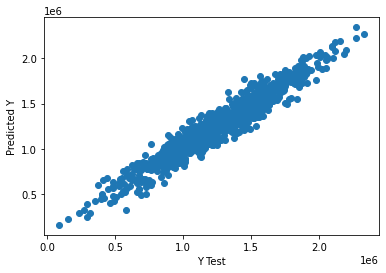

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [78]:
#hyper parameter tunning - test_size 0.2, random_state 42
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('R2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is== ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 socre is  0.9146818498754012
mean_sqrd_error is== 10068422551.400925
root_mean_squared error of is==  100341.52954485458


In [50]:
#hyper parameter tunning - test_size 0.2, random_state 101
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('R2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is== ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 socre is  0.921171916540202
mean_sqrd_error is== 10100187858.867594
root_mean_squared error of is==  100499.69083966177


In [79]:
#export
joblib.dump(lin, "housing.pkl")

['housing.pkl']

In [34]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

100499.69083964117

In [74]:
print(lin.intercept_)

-2642239.251234695
